In [18]:
import pandas as pd

data=pd.read_csv('data.csv') 
data = data.dropna()

In [19]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

protein_analyse_lists=[ProteinAnalysis(x) for x in data['protein_sequence']]

In [20]:
d={}
for i in protein_analyse_lists:
    dict_protein_amino=i.get_amino_acids_percent()
    for k, v in dict_protein_amino.items():
        if k in d:
            d[k].append(v)
        else:
            d[k]=[v]

In [21]:
for k, v in d.items():
    data[k]=v


data['char_count']           = data.protein_sequence.apply(lambda x: len(x))
data['isoelectric_point']    = [i.isoelectric_point() for i in protein_analyse_lists]
data["stability_analysis"]   = [i.instability_index()for i in protein_analyse_lists]
data["aromaticity_analysis"] = [i.aromaticity() for i in protein_analyse_lists]
data["isoelectric_analysis"] = [i.isoelectric_point()for i in protein_analyse_lists]
data["charge_analysis"]      = [i.charge_at_pH(8.0) for i in protein_analyse_lists]
data["helix_analysis"]       = [i.secondary_structure_fraction()[0]for i in protein_analyse_lists]
data["turn_analysis"]        = [i.secondary_structure_fraction()[1]for i in protein_analyse_lists]
data["sheet_analysis"]       = [i.secondary_structure_fraction()[2]for i in protein_analyse_lists]
data["mec_analysis_1"]       = [i.molar_extinction_coefficient()[0]for i in protein_analyse_lists]
data["mec_analysis_2"]       = [i.molar_extinction_coefficient()[1]for i in protein_analyse_lists]
data["gravy_analysis"]       = [i.gravy() for i in protein_analyse_lists]

In [22]:
data.head()

,seq_id,protein_sequence,pH,data_source,tm,A,C,D,E,F,...,M,N,P,Q,R,S,T,V,W,Y
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,0.131965,0.002933,0.038123,0.087977,0.038123,...,0.023460,0.014663,0.052786,0.017595,0.073314,0.032258,0.041056,0.108504,0.011730,0.008798
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,0.097902,0.000000,0.034965,0.181818,0.020979,...,0.006993,0.020979,0.027972,0.076923,0.104895,0.048951,0.041958,0.045455,0.010490,0.010490
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,0.100604,0.018109,0.054326,0.064386,0.042254,...,0.012072,0.030181,0.040241,0.050302,0.062374,0.066398,0.060362,0.060362,0.006036,0.032193
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,0.075472,0.018868,0.071698,0.109434,0.045283,...,0.007547,0.033962,0.060377,0.033962,0.037736,0.060377,0.071698,0.052830,0.011321,0.015094
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,0.059269,0.009649,0.053756,0.053756,0.022054,...,0.021365,0.044797,0.088215,0.037216,0.043418,0.101999,0.082702,0.085458,0.011027,0.032391


In [23]:
x=data.drop(['seq_id','protein_sequence','data_source','tm'],axis=1)

In [24]:
y=data.tm

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

reg=RandomForestRegressor()
reg.fit( X_train, y_train) 
y_pred=reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.6163817688083707


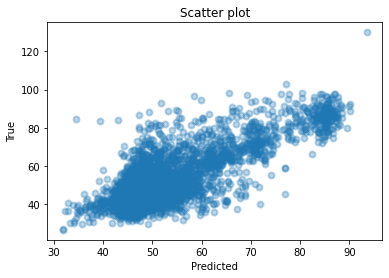

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test, lw=2, alpha=0.3)   
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Scatter plot')
plt.show()

In [41]:
from xgboost import XGBRegressor
import xgboost as xgb

xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)
y_pred=xg_reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.5992886582683219


In [47]:
from sklearn.tree import DecisionTreeRegressor 
  

regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print(r2_score(y_test, y_pred))

0.18667204900817225


In [48]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
print(r2_score(y_test, y_pred))

-0.019913059706254455
